# TensorFlow MNIST Tutorial

based on original tutorial 
https://www.tensorflow.org/get_started/mnist/beginners

## Background

We want to assign a *probability* that object belongs a class (e.g. the digit recoginition). The **softmax** regression is the simplest model, it returns a vector of probabilities that sums to 1. Usually, sofmax layer is the final step at sophisticated model.

A **softmax** regression consists of 
1. estimate the evidence of our input being in certain classes
2. and then we convert that evidence into probabilities.


The pixel intensities gives the evidence that images belong to particular class. We do a weighted sum of the pixel intensities. The weight is `(0, ∞)` if the pixes has high intensity in that class (that pixel having a high intensity is evidence the image being in that class) and `(-∞, 0)` otherwise. We add a bias to indicate that some things are indepepndent of the input

```
Ei = ∑Wi,j * xj + bi
     j 
```

`Wi,j` is the weight for pixel `j` in the class `i`
`bi` is the bias for class `i`

The evidence is converted into probability using **softmax** function. This function shapes the output of liner function into probability distribution over `N` classes (`N=10` for digit recognition) 

```
y = softmax(E)

softmax(x) = normalize(exp(x))
```



We can generalize the solution throught the following model

```
y = softmax(W * x + b)
```

## Implement regression

In [19]:
import tensorflow as tf

Import a MNIST dataset using helper function. The MNIST consists of
1. 55K points of traning dataset, `mnist.train`
2. 10K points of test dataset, `mnist.test`
3. 5K points of validation dataset, `mnist.validation`


In [20]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/mnist", one_hot=True)

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


Each image is 28 pixels by 28 pixels matrix. We can flatten this matrix into a vector of 28x28 = 784 numbers.

> Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

`x` is the placeholder to input any number of MNIST images, each is 2-D tensor of floating points.

In [21]:
x = tf.placeholder(tf.float32, [None, 784])

In [22]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Let's define out model via **softmax**

In [23]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Train model

The model training requires a definition of loss function. The loss function "represents how far off our model is from our desired outcome". The traning process is the minimisation of the loss function.

The **cross-entropy** function is the common approach to determine the loss. 

```
H(y) = - ∑ y'i log(yi) 
```

Where `y` is predicted probability distribution, `y'` is the true distribution. 
> In some rough sense, the cross-entropy is measuring how inefficient our predictions are for describing the truth. Going into more detail about cross-entropy is beyond the scope of this tutorial, but it's [well worth](http://colah.github.io/posts/2015-09-Visual-Information/) 

In [32]:
y_truth = tf.placeholder(tf.float32, [None, 10])

In [33]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_truth * tf.log(y), reduction_indices=[1]))

The apply the loss function optimization algorithm (e.g. the descent optimization)

In [34]:
train = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Train the model

In [43]:
session = tf.InteractiveSession()
globalv = tf.global_variables_initializer()

session.run(globalv)

In [24]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  session.run(train, feed_dict={x: batch_xs, y_truth: batch_ys})

## Evaluate model

`tf.argmax` return the index of highest entity in the tensor, the class with higest probability. We compare results of our model with the test dataset.

In [25]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_truth,1))

The accuracy is the mean of matches

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
value = session.run(accuracy, feed_dict={x: mnist.test.images, y_truth: mnist.test.labels})

print(value)

0.9213


Use the trained classifier.

In [27]:
classify = tf.argmax(y,1)
size   = 42
labels = session.run(classify, feed_dict={x: mnist.validation.images[:size]})

print(labels)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 7 1 3 8 6 7 0 5 6
 0 7 6 1 8]


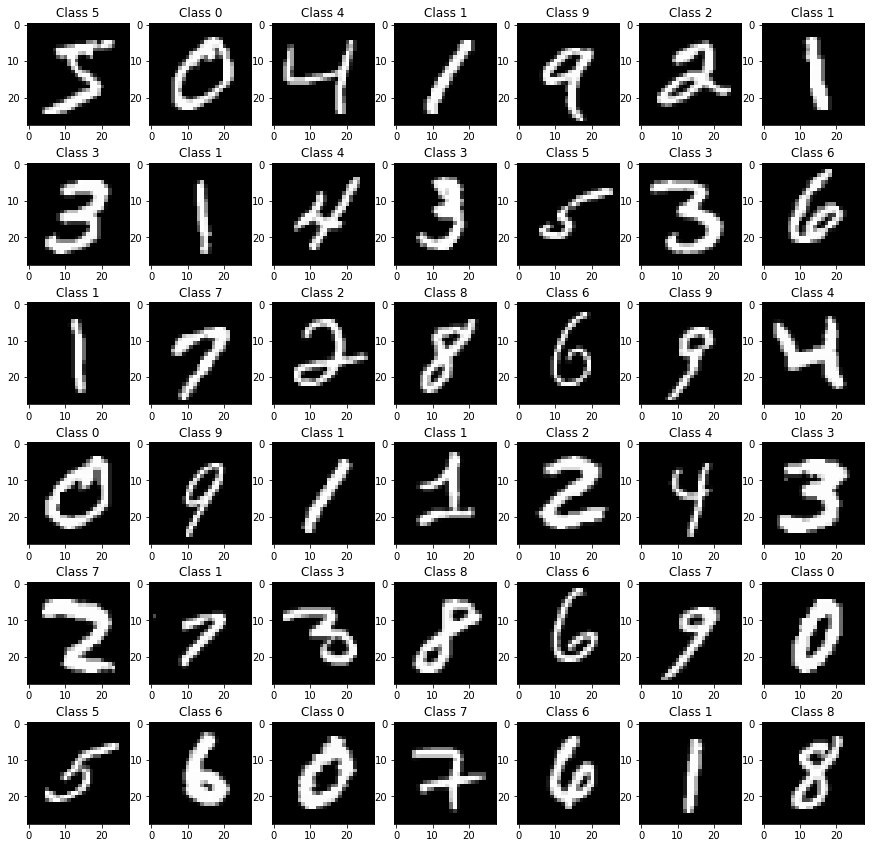

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 15))
for i in range(0,size):
    plt.subplot(6, 7, i + 1)

    pixels = np.array(mnist.validation.images[i], dtype='float32')
    pixels = pixels.reshape((28, 28))

    plt.title('Class {label}'.format(label=labels[i]))
    plt.imshow(pixels, cmap='gray')
    
plt.show()